In [2]:
import os
os.chdir('/Users/apple/Desktop/datasets')

In [3]:
#ls

In [4]:
import pandas as pd

In [5]:
data=pd.read_csv('1sales.csv')
data.head(10)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
5,5,295670,AA Batteries (4-pack),1,3.84,2019-12-31 22:58:00,"200 Jefferson St, New York City, NY 10001",12,3.84,New York City,22
6,6,295671,USB-C Charging Cable,1,11.95,2019-12-16 15:10:00,"928 12th St, Portland, OR 97035",12,11.95,Portland,15
7,7,295672,USB-C Charging Cable,2,11.95,2019-12-13 09:29:00,"813 Hickory St, Dallas, TX 75001",12,23.90,Dallas,9
8,8,295673,Bose SoundSport Headphones,1,99.99,2019-12-15 23:26:00,"718 Wilson St, Dallas, TX 75001",12,99.99,Dallas,23
9,9,295674,AAA Batteries (4-pack),4,2.99,2019-12-28 11:51:00,"77 7th St, Dallas, TX 75001",12,11.96,Dallas,11


In [6]:
data.describe()

,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,8340.388475,230417.569379,1.124383,184.399735,7.059140,185.490917,14.413305
std,5450.554093,51512.737110,0.442793,332.731330,3.502996,332.919771,5.423416
min,0.000000,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,3894.000000,185831.250000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,7786.000000,230367.500000,1.000000,14.950000,7.000000,14.950000,15.000000
75%,11872.000000,275035.750000,1.000000,150.000000,10.000000,150.000000,19.000000
max,25116.000000,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000


In [7]:
data.isnull().sum()

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

**THE INFORMATION BELOW SHOWS THE NUMBER OF ITEMS THAT GOT SOLD IN EACH CATEGORIES, IN A DESCENDING ORDER**

In [8]:
products=data['Product'].value_counts()
products

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

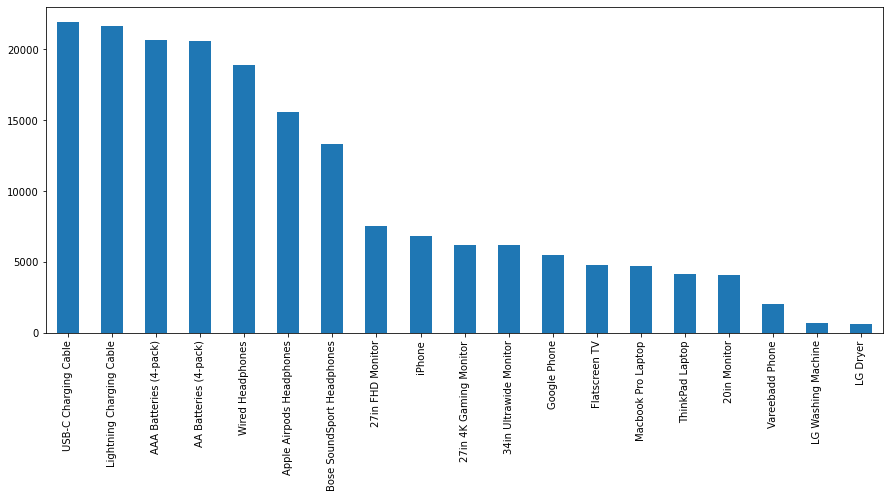

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
products.plot(kind='bar')
plt.show()

**THE DISTRIBUTIONS BELOW SHOWS A RIGHT SKEWNESS, SOME EXPENSIVE OUTLIERS/HIGH-VALUE ITEMS THAT CONTRIBUTES TO THE LONG TAIL**

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price Each', ylabel='Density'>

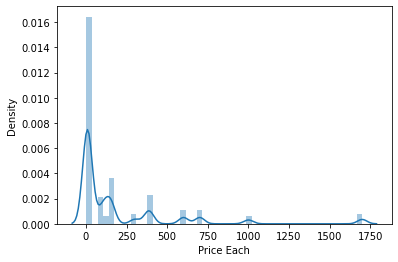

In [10]:
import seaborn as sns
sns.distplot(data['Price Each'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

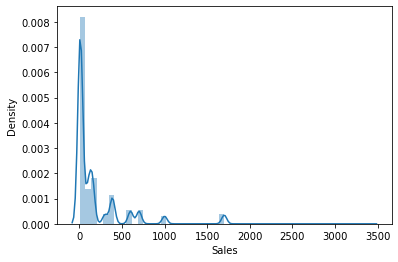

In [11]:
import seaborn as sns
sns.distplot(data['Sales'])

**THE SCATTER PLOT INDICATES THAT THERE'S A LINEAR RELATIONSHIP BETWEEN THE PRICE AND SALES**

<AxesSubplot:xlabel='Price Each', ylabel='Sales'>

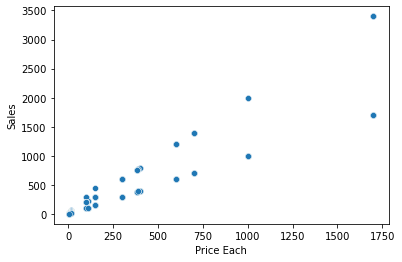

In [11]:
sns.scatterplot(x='Price Each', y='Sales', data=data)

In [12]:
data.groupby('City')['Price Each', 'Sales'].max()

/var/folders/pb/q49x3lbx6313whr2jx93rk180000gn/T/ipykernel_42624/3554945150.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('City')['Price Each', 'Sales'].max()


,Price Each,Sales
City,,
Atlanta,1700.0,1700.0
Austin,1700.0,1700.0
Boston,1700.0,3400.0
Dallas,1700.0,1700.0
Los Angeles,1700.0,1700.0
New York City,1700.0,3400.0
Portland,1700.0,1700.0
San Francisco,1700.0,3400.0
Seattle,1700.0,1700.0


In [13]:
data.groupby('Month')['Price Each', 'Sales'].max()

/var/folders/pb/q49x3lbx6313whr2jx93rk180000gn/T/ipykernel_42624/1176384441.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Month')['Price Each', 'Sales'].max()


,Price Each,Sales
Month,,
1,1700.0,1999.98
2,1700.0,1700.00
3,1700.0,1700.00
4,1700.0,3400.00
5,1700.0,3400.00
6,1700.0,3400.00
7,1700.0,1700.00
8,1700.0,1700.00
9,1700.0,1700.00


In [14]:
data[data['Sales']==data['Sales'].max()]

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
29683,4717,181069,Macbook Pro Laptop,2,1700.0,2019-04-27 21:01:00,"668 Park St, San Francisco, CA 94016",4,3400.0,San Francisco,21
30183,5219,181544,Macbook Pro Laptop,2,1700.0,2019-04-22 12:48:00,"731 11th St, New York City, NY 10001",4,3400.0,New York City,12
89114,6776,200528,Macbook Pro Laptop,2,1700.0,2019-05-13 13:40:00,"643 4th St, Boston, MA 02215",5,3400.0,Boston,13
172777,385,210292,Macbook Pro Laptop,2,1700.0,2019-06-08 09:00:00,"953 Ridge St, San Francisco, CA 94016",6,3400.0,San Francisco,9


In [15]:
data.columns

Index(['Unnamed: 0', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')

In [16]:
data.drop(['Unnamed: 0', 'Order ID'],axis=1, inplace=True)

In [17]:
data.corr(method='pearson')

,Quantity Ordered,Price Each,Month,Sales,Hour
Quantity Ordered,1.000000,-0.148272,0.000791,-0.139417,-0.002218
Price Each,-0.148272,1.000000,-0.003375,0.999203,0.001721
Month,0.000791,-0.003375,1.000000,-0.003466,0.001731
Sales,-0.139417,0.999203,-0.003466,1.000000,0.001668
Hour,-0.002218,0.001721,0.001731,0.001668,1.000000


In [18]:
data['sity'] = data['Purchase Address'].apply(lambda x: x.split(',')[1].strip())
print(data['sity'])

0         New York City
1         New York City
2         New York City
3         San Francisco
4               Atlanta
              ...      
185945           Boston
185946    New York City
185947    San Francisco
185948    San Francisco
185949          Atlanta
Name: sity, Length: 185950, dtype: object


In [21]:
data.head(10)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
5,5,295670,AA Batteries (4-pack),1,3.84,2019-12-31 22:58:00,"200 Jefferson St, New York City, NY 10001",12,3.84,New York City,22
6,6,295671,USB-C Charging Cable,1,11.95,2019-12-16 15:10:00,"928 12th St, Portland, OR 97035",12,11.95,Portland,15
7,7,295672,USB-C Charging Cable,2,11.95,2019-12-13 09:29:00,"813 Hickory St, Dallas, TX 75001",12,23.90,Dallas,9
8,8,295673,Bose SoundSport Headphones,1,99.99,2019-12-15 23:26:00,"718 Wilson St, Dallas, TX 75001",12,99.99,Dallas,23
9,9,295674,AAA Batteries (4-pack),4,2.99,2019-12-28 11:51:00,"77 7th St, Dallas, TX 75001",12,11.96,Dallas,11
